In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
#Create clusters using agglomerative clustering 1 av 3 metoder
#agglomerative clustering is a type of hierarchical clustering that builds nested clusters by merging or splitting them successively.
#agglomerative är som ett familj träd

In [3]:
wholesale_data = pd.read_csv("Wholesale customers data.csv")
wholesale_data.head() #kolla hur datan ser ut 
wholesale_data.describe() #kolla lite statistik (median, medel, max osv)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
# Dem kolumner vi vill använda för clustering
mu_cols = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]

mu_data = wholesale_data[mu_cols]

# median, medel, max osv
mu_data.describe()

#Nere ser vi årliga spendering (m.u.) per produktkategori
#Vi vill isolera dem så att vi inte ta med onödiga tabbeler


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


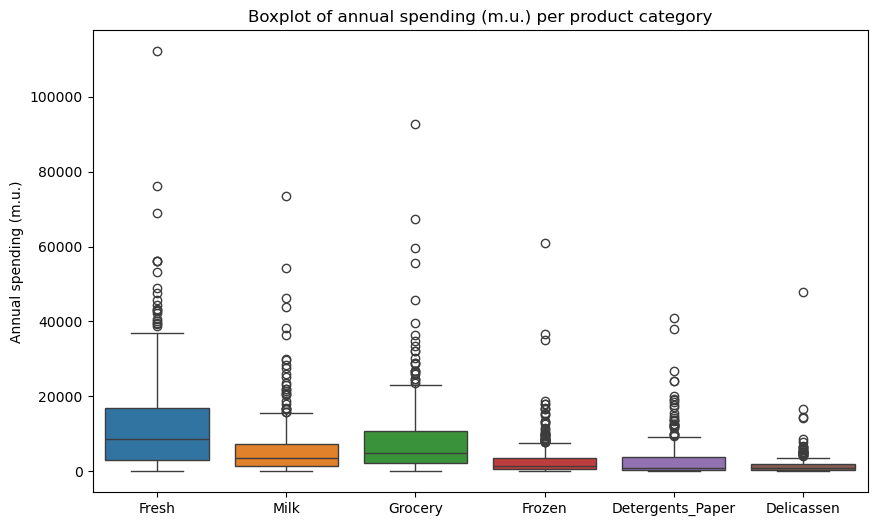

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=mu_data)
plt.title("Boxplot of annual spending (m.u.) per product category")
plt.ylabel("Annual spending (m.u.)")
plt.show()




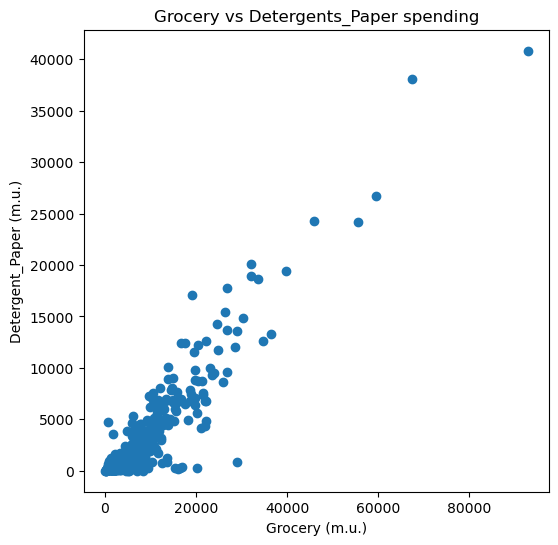

In [6]:
plt.figure(figsize=(6, 6))
plt.scatter(mu_data["Grocery"], mu_data["Detergents_Paper"])
plt.xlabel("Grocery (m.u.)")
plt.ylabel("Detergent_Paper (m.u.)")
plt.title("Grocery vs Detergents_Paper spending")
plt.show()



In [7]:
X = wholesale_data[["Grocery", "Detergents_Paper"]].values
print(X[:5])


[[7561 2674]
 [9568 3293]
 [7684 3516]
 [4221  507]
 [7198 1777]]


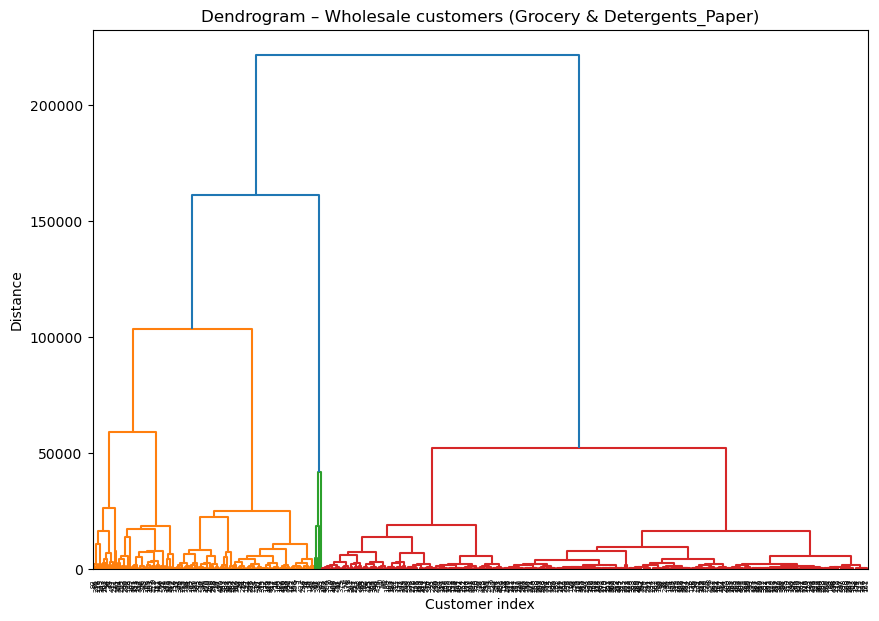

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 1. Hierarkisk länkning – samma stil som läraren, men med Ward (som du redan valt)
linked = linkage(X, method="ward")

# 2. Skapa dendrogrammet
plt.figure(figsize=(10, 7))
dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True
)
plt.title("Dendrogram – Wholesale customers (Grocery & Detergents_Paper)")
plt.xlabel("Customer index")
plt.ylabel("Distance")
plt.show()


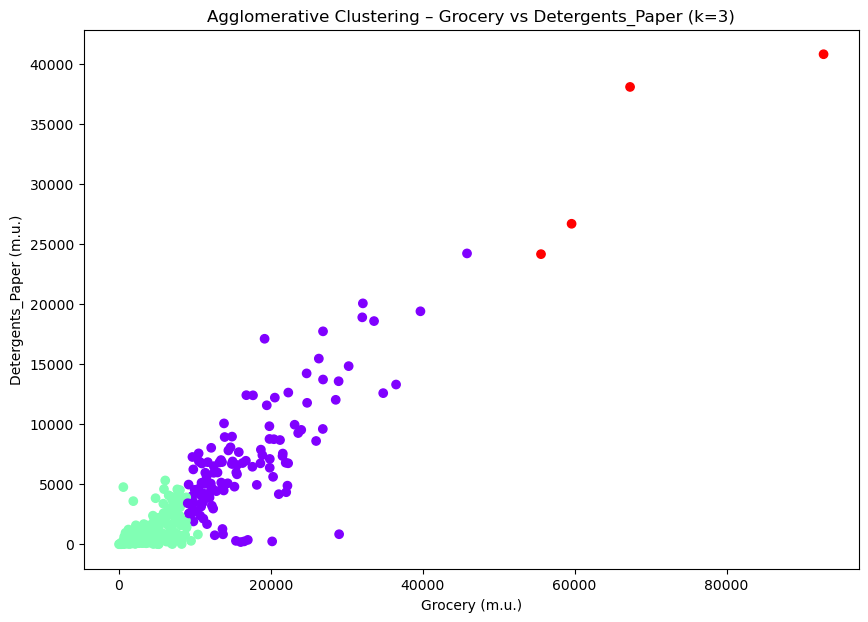

In [9]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt


n_clusters = 3   

cluster = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage='ward'    
)

labels = cluster.fit_predict(X)   


plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="rainbow")
plt.xlabel("Grocery (m.u.)")
plt.ylabel("Detergents_Paper (m.u.)")
plt.title(f"Agglomerative Clustering – Grocery vs Detergents_Paper (k={n_clusters})")
plt.show()


In [10]:
cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels = cluster.fit_predict(X)
